In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Concatenate train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Add a new column to identify the data source
train_data['is_train'] = 1  # 1 for train data
test_data['is_train'] = 0   # 0 for test data

# Concatenate both dataframes
df= pd.concat([train_data, test_data], ignore_index=True)

#to understand the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [77]:
print(df.isnull().sum())


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
is_train            0
Length: 82, dtype: int64


In [78]:
df.drop('Id', axis=1, inplace=True)

In [79]:
df.shape

(2919, 81)

In [80]:


# Assuming your DataFrame is named df
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_columns)

Columns with missing values and their counts:
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


In [81]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,1
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,1
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,1
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,1
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0,1


In [82]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Assuming your DataFrame is called df
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Compute Cramér's V between MSZoning and all other categorical variables
cramers_results = {}
for col in categorical_cols:
    if col != 'MSZoning':
        try:
            v = cramers_v(df['MSZoning'], df[col])
            cramers_results[col] = v
        except:
            continue  # Skip columns that raise errors (e.g., due to too many missing values)

# Display sorted results
sorted_cramers = sorted(cramers_results.items(), key=lambda item: item[1], reverse=True)
for col, score in sorted_cramers:
    print(f"{col}: {score:.3f}")


Alley: 0.798
Neighborhood: 0.656
Street: 0.298
CentralAir: 0.291
Foundation: 0.249
PavedDrive: 0.247
GarageFinish: 0.233
ExterQual: 0.231
Exterior2nd: 0.219
GarageType: 0.217
BsmtQual: 0.213
Exterior1st: 0.212
BldgType: 0.199
HouseStyle: 0.182
KitchenQual: 0.179
LotShape: 0.157
BsmtFinType1: 0.146
GarageQual: 0.134
HeatingQC: 0.133
Electrical: 0.125
MasVnrType: 0.119
BsmtCond: 0.119
BsmtExposure: 0.100
FireplaceQu: 0.080
Functional: 0.053
PoolQC: nan
SaleCondition: 0.132
SaleType: 0.124
GarageCond: 0.109
Condition1: 0.106
ExterCond: 0.103
RoofStyle: 0.091
Fence: 0.087
LandContour: 0.080
LotConfig: 0.078
MiscFeature: 0.077
BsmtFinType2: 0.064
Heating: 0.061
Condition2: 0.053
LandSlope: 0.050
RoofMatl: 0.034
Utilities: 0.010


C:\Users\livin\AppData\Local\Temp\ipykernel_10372\459712908.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))


In [83]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [84]:
#first handling missing values in alley. nan alley could actually mean that property has no alley access. so fill missing values as no alley.
df['Alley'] = df['Alley'].fillna('NoAlley')

In [85]:
# Impute missing 'MSZoning' using group mode based on 'Neighborhood' and 'Alley' since mszoning is highly correlated to them.
df['MSZoning'] = df.groupby(['Neighborhood', 'Alley'])['MSZoning'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else df['MSZoning'].mode().iloc[0])
)


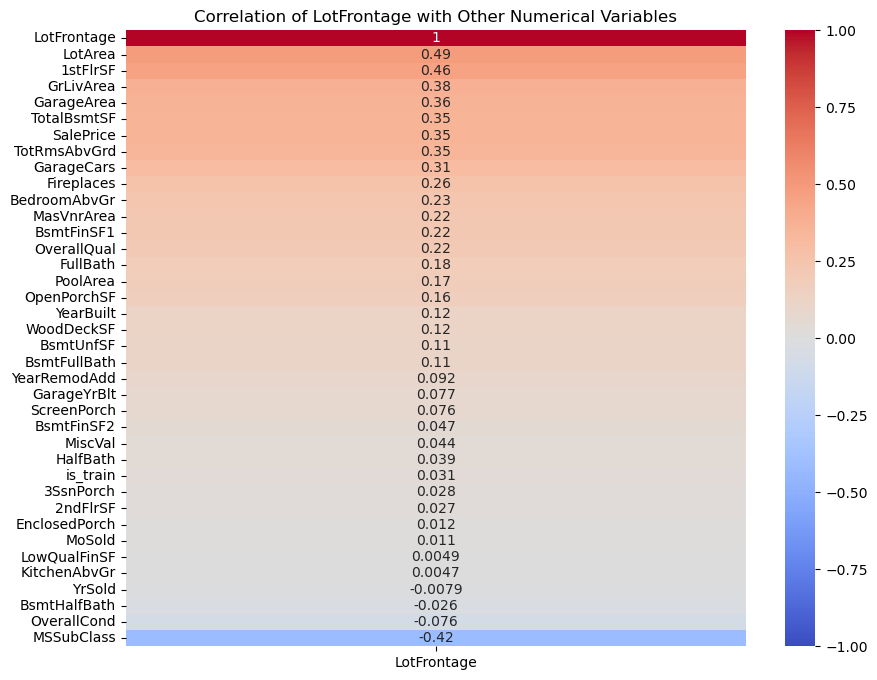

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation of LotFrontage with other numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['LotFrontage']].sort_values(by='LotFrontage', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of LotFrontage with Other Numerical Variables')
plt.show()


In [87]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Select categorical columns (object and category types)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Calculate and print Cramér's V for LotFrontage vs each categorical feature
for feature in categorical_cols:
    # Check if the feature has a significant amount of data and non-null values
    if df[feature].notnull().sum() > 0: 
        v = cramers_v(df['LotFrontage'], df[feature])
        print(f"Cramér's V between LotFrontage and {feature}: {v}")


Cramér's V between LotFrontage and MSZoning: 0.4275828383039784
Cramér's V between LotFrontage and Street: 0.3027433934931733
Cramér's V between LotFrontage and Alley: 0.40957516393022725
Cramér's V between LotFrontage and LotShape: 0.5036388911869646
Cramér's V between LotFrontage and LandContour: 0.3039617231465331
Cramér's V between LotFrontage and Utilities: nan
Cramér's V between LotFrontage and LotConfig: 0.38693102243943234
Cramér's V between LotFrontage and LandSlope: 0.4208395837447767
Cramér's V between LotFrontage and Neighborhood: 0.4209655256104241
Cramér's V between LotFrontage and Condition1: 0.2678916556199301
Cramér's V between LotFrontage and Condition2: 0.2557390406198645
Cramér's V between LotFrontage and BldgType: 0.5659098011115254
Cramér's V between LotFrontage and HouseStyle: 0.2780649959537732
Cramér's V between LotFrontage and RoofStyle: 0.37298577505904557
Cramér's V between LotFrontage and RoofMatl: 0.4049922358577533
Cramér's V between LotFrontage and Exter

C:\Users\livin\AppData\Local\Temp\ipykernel_10372\2625503845.py:10: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))


Cramér's V between LotFrontage and CentralAir: 0.30464478956488933
Cramér's V between LotFrontage and Electrical: 0.19115087717122867
Cramér's V between LotFrontage and KitchenQual: 0.3376177370642594
Cramér's V between LotFrontage and Functional: 0.257659036780398
Cramér's V between LotFrontage and FireplaceQu: 0.3670431934167501
Cramér's V between LotFrontage and GarageType: 0.4071822891955893
Cramér's V between LotFrontage and GarageFinish: 0.40680133379086275
Cramér's V between LotFrontage and GarageQual: 0.2136530712238179
Cramér's V between LotFrontage and GarageCond: 0.1787019475122938
Cramér's V between LotFrontage and PavedDrive: 0.3139966303974452
Cramér's V between LotFrontage and PoolQC: 0.9999999999999999
Cramér's V between LotFrontage and Fence: 0.44698215145630976
Cramér's V between LotFrontage and MiscFeature: 0.5996045542788371
Cramér's V between LotFrontage and SaleType: 0.2255001615261427
Cramér's V between LotFrontage and SaleCondition: 0.27980039766537196


In [88]:

# Fill missing values in 'PoolQC' with 'NoPool'
df['PoolQC'] = df['PoolQC'].fillna('NoPool')

In [89]:
# Impute missing values in 'LotFrontage' by grouping based on 'PoolQC', 'BldgType', 'LotShape', and 'LotArea'
df['LotFrontage'] = df.groupby(['PoolQC', 'BldgType', 'LotShape'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [90]:

# Assuming your DataFrame is named df
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_columns)


Columns with missing values and their counts:
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


In [91]:
df['Utilities'].unique()


array(['AllPub', 'NoSeWa', nan], dtype=object)

In [92]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [93]:
df['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object)

In [94]:
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [95]:

# Loop through each column and fill missing values if missing count is < 3
for col in df.columns:
    if df[col].isnull().sum() > 0 and df[col].isnull().sum() < 3:
        print(f"{col}: {df[col].isnull().sum()} missing being replaced with mode or median")
        if df[col].dtype in ['object', 'category']:  # Categorical
            df[col] = df[col].fillna(df[col].mode()[0])
        else:  # Numerical
            df[col] = df[col].fillna(df[col].median())

        

BsmtFinSF1: 1 missing being replaced with mode or median
BsmtFinSF2: 1 missing being replaced with mode or median
BsmtUnfSF: 1 missing being replaced with mode or median
TotalBsmtSF: 1 missing being replaced with mode or median
Electrical: 1 missing being replaced with mode or median
BsmtFullBath: 2 missing being replaced with mode or median
BsmtHalfBath: 2 missing being replaced with mode or median
KitchenQual: 1 missing being replaced with mode or median
Functional: 2 missing being replaced with mode or median
GarageCars: 1 missing being replaced with mode or median
GarageArea: 1 missing being replaced with mode or median
SaleType: 1 missing being replaced with mode or median


In [96]:
# Assuming your DataFrame is named df
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_columns)


Columns with missing values and their counts:
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
Fence           2348
MiscFeature     2814
SalePrice       1459
dtype: int64


In [97]:
'''MasVnrType stands for Masonry Veneer Type, which describes the type of masonry veneer used on the exterior of the house.'''
#masvnrtype being NaN could simply mean that there is no masonry veneer used in the house.
# to check we can see if masvnrarea for such nan values is 0. if so, we can simply fillna with "none"
df[df['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [98]:
# Find rows where MasVnrType is missing but MasVnrArea is not zero or missing
mask = df['MasVnrType'].isnull() & (df['MasVnrArea'].fillna(0) != 0)
df[['MasVnrType', 'MasVnrArea']][mask]

,MasVnrType,MasVnrArea
2610,NaN,198.0


In [99]:
df[df['MasVnrArea'] > 0]['MasVnrType'].value_counts() # to check Check most common MasVnrType where area > 0


BrkFace    877
Stone      248
BrkCmn      25
None         7
Name: MasVnrType, dtype: int64

In [100]:
# Step 1: Fill 'MasVnrType' with 'None' where 'MasVnrArea' is 0
df.loc[(df['MasVnrType'].isnull()) & (df['MasVnrArea'] == 0), 'MasVnrType'] = 'None'

# Step 2: Fill remaining missing 'MasVnrType' values with the mode
mode_type = df['MasVnrType'].mode()[0]
df['MasVnrType'] = df['MasVnrType'].fillna(mode_type)


In [101]:

# Filter rows where 'MasVnrArea' is NaN and print 'MasVnrType' for those rows
print(df[df['MasVnrArea'].isna()][['MasVnrType', 'MasVnrArea']])

     MasVnrType  MasVnrArea
234        None         NaN
529        None         NaN
650        None         NaN
936        None         NaN
973        None         NaN
977        None         NaN
1243       None         NaN
1278       None         NaN
1691       None         NaN
1706       None         NaN
1882       None         NaN
1992       None         NaN
2004       None         NaN
2041       None         NaN
2311       None         NaN
2325       None         NaN
2340       None         NaN
2349       None         NaN
2368       None         NaN
2592       None         NaN
2657       None         NaN
2686       None         NaN
2862       None         NaN


In [102]:
# this means that some entries of MasVnrArea is entered as NaN because there were no Masonry veneer so can be filled with 0
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [103]:

# Assuming your DataFrame is named df
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_columns)


Columns with missing values and their counts:
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
Fence           2348
MiscFeature     2814
SalePrice       1459
dtype: int64


In [104]:
basement_cols = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual']
# all these features are related to basement. seeing that all of them have similar missing values. it could mean they have no basement in that property
#so lets print the rows where all 5 of them are nan, then we can just replace them with noBasement as a value
df[df[basement_cols].isna().all(axis=1)][basement_cols]


,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtCond,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2803,NaN,NaN,NaN,NaN,NaN
2804,NaN,NaN,NaN,NaN,NaN
2824,NaN,NaN,NaN,NaN,NaN
2891,NaN,NaN,NaN,NaN,NaN


In [105]:
#if we notice , apart from the nobasement intuition , there are some features that have genuine missing values.
#for instance bsmtfintype1 has 79 missing values while bsmtfintype2 has 80, ie that could be a actual missing value even though basement is present in that property.
#likewise, bsmtexposure,bsmtcond has 3 extra missing values while bsmtqual has 2 extra
#code to print the 5 features where not all of them arent nan but atleast one of them is nan.

basement_cols = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual']

# Rows with at least one missing in basement features
missing_some_basement = df[basement_cols].isna().any(axis=1)

# But not all missing
not_all_missing = ~df[basement_cols].isna().all(axis=1)

# Combine both conditions
odd_rows = df[missing_some_basement & not_all_missing][basement_cols]

print(odd_rows)



     BsmtFinType1 BsmtFinType2 BsmtExposure BsmtCond BsmtQual
332           GLQ          NaN           No       TA       Gd
948           Unf          Unf          NaN       TA       Gd
1487          Unf          Unf          NaN       TA       Gd
2040          GLQ          Rec           Mn      NaN       Gd
2185          BLQ          Unf           No      NaN       TA
2217          Unf          Unf           No       Fa      NaN
2218          Unf          Unf           No       TA      NaN
2348          Unf          Unf          NaN       TA       Gd
2524          ALQ          Unf           Av      NaN       TA


In [106]:
#firstly handling the missing values where all the basement related features are nan which means the property has nobasement.
#so 79 rows of all these 5 features will be filled with "noBasement"
basement_cols = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual']
# Identify rows where all basement-related features are NaN
all_missing = df[basement_cols].isna().all(axis=1)

# Fill those rows with 'NoBasement'
df.loc[all_missing, basement_cols] = df.loc[all_missing, basement_cols].fillna('NoBasement')

In [107]:
#nextly we need to handle remaining missing values in each of the basement features 
basement_cols = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual']
print(df[basement_cols].isna().sum())

BsmtFinType1    0
BsmtFinType2    1
BsmtExposure    3
BsmtCond        3
BsmtQual        2
dtype: int64


In [108]:
from scipy.stats import mode
#what this code does is that bsmtfintype2 has 1 missing value right,
#  it groups the rows based on bsmtfintype1, bsmtexposure, bsmtcond and bsmtqual and then replaces the nan with mode of that group.
# same is repeated for bsmtexposure and rest of basement related feature missing values.
#this kind of imputation makes more sense and could be more accurate than just imputing global mode of that column


# Function to fill missing values with mode, grouped by other columns
def fillna_with_group_mode(df, target_col, group_cols):
    # Apply only to missing values
    mask = df[target_col].isna()
    
    # Group by the columns and get the mode for each group
    grouped = df.groupby(group_cols)[target_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    
    # Apply the grouped mode to the missing values
    df.loc[mask, target_col] = df.loc[mask, group_cols].apply(lambda row: grouped.get(tuple(row), df[target_col].mode()[0]), axis=1)

# List of basement features
basement_cols_with_na = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual']

# Fill each column using mode grouped by other available basement features
for target_col in basement_cols_with_na:
    group_cols = [col for col in basement_cols_with_na + ['BsmtFinType1'] if col != target_col]
    fillna_with_group_mode(df, target_col, group_cols)


In [109]:

# Assuming your DataFrame is named df
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_columns)

Columns with missing values and their counts:
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
Fence           2348
MiscFeature     2814
SalePrice       1459
dtype: int64


In [110]:
# similar to basement related features we have Garage related features missing. so lets use the same intuition used for basement features
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

# Print rows where all garage-related features are null
print(df[df[garage_cols].isna().all(axis=1)][garage_cols])

     GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
39          NaN          NaN          NaN        NaN        NaN
48          NaN          NaN          NaN        NaN        NaN
78          NaN          NaN          NaN        NaN        NaN
88          NaN          NaN          NaN        NaN        NaN
89          NaN          NaN          NaN        NaN        NaN
...         ...          ...          ...        ...        ...
2893        NaN          NaN          NaN        NaN        NaN
2909        NaN          NaN          NaN        NaN        NaN
2913        NaN          NaN          NaN        NaN        NaN
2914        NaN          NaN          NaN        NaN        NaN
2917        NaN          NaN          NaN        NaN        NaN

[157 rows x 5 columns]


In [111]:
# Identify rows where all garage-related columns are NaN
garage_na_mask = df[garage_cols].isna().all(axis=1)

# Apply the filling only to those rows where all garage-related columns are NaN
df.loc[garage_na_mask, garage_cols] = df.loc[garage_na_mask, garage_cols].apply(
    lambda col: col.fillna('NoGarage') if col.dtype == 'object' else col.fillna(0), axis=0
)


In [112]:
df[garage_cols].isna().sum()

GarageType      0
GarageYrBlt     2
GarageFinish    2
GarageQual      2
GarageCond      2
dtype: int64

In [113]:
# Filter rows where at least one garage-related column is NaN
garage_na_rows = df[df[garage_cols].isna().any(axis=1)][garage_cols]

# Print the rows
print(garage_na_rows)


     GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
2126     Detchd          NaN          NaN        NaN        NaN
2576     Detchd          NaN          NaN        NaN        NaN


In [114]:
# Filter rows where GarageType is 'Detchd' (Detached) and print only the relevant garage columns
detached_garage_df = df[df['GarageType'] == 'Detchd'][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]
print(detached_garage_df)


     GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
3        Detchd       1998.0          Unf         TA         TA
8        Detchd       1931.0          Unf         Fa         TA
10       Detchd       1965.0          Unf         TA         TA
12       Detchd       1962.0          Unf         TA         TA
15       Detchd       1991.0          Unf         TA         TA
...         ...          ...          ...        ...        ...
2886     Detchd       1942.0          Unf         TA         TA
2887     Detchd       1950.0          Fin         TA         TA
2889     Detchd       1925.0          Unf         TA         TA
2890     Detchd       1957.0          Unf         TA         TA
2916     Detchd       1960.0          Unf         TA         TA

[779 rows x 5 columns]


In [115]:
# Define the columns to fill
garage_cols = ['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

# Fill missing values by grouping by 'GarageType' and using the mode or median
for col in garage_cols:
    if df[col].dtype == 'object':  # For categorical columns, use mode
        df[col] = df.groupby('GarageType')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else df[col].mode()[0])
    else:  # For numerical columns, use median
        df[col] = df.groupby('GarageType')[col].transform(lambda x: x.median() if not x.isna().all() else df[col].median())

# Check the result
print(df[garage_cols].isna().sum())


GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


In [116]:

# Assuming your DataFrame is named df
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_columns)

Columns with missing values and their counts:
FireplaceQu    1420
Fence          2348
MiscFeature    2814
SalePrice      1459
dtype: int64


In [117]:
# Define the columns to be filled
columns_to_fill = ['FireplaceQu', 'Fence', 'MiscFeature']

# Fill missing values with appropriate values
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna('No' + col.name))

# Check the missing values again after filling
print(df[columns_to_fill].isna().sum())


FireplaceQu    0
Fence          0
MiscFeature    0
dtype: int64


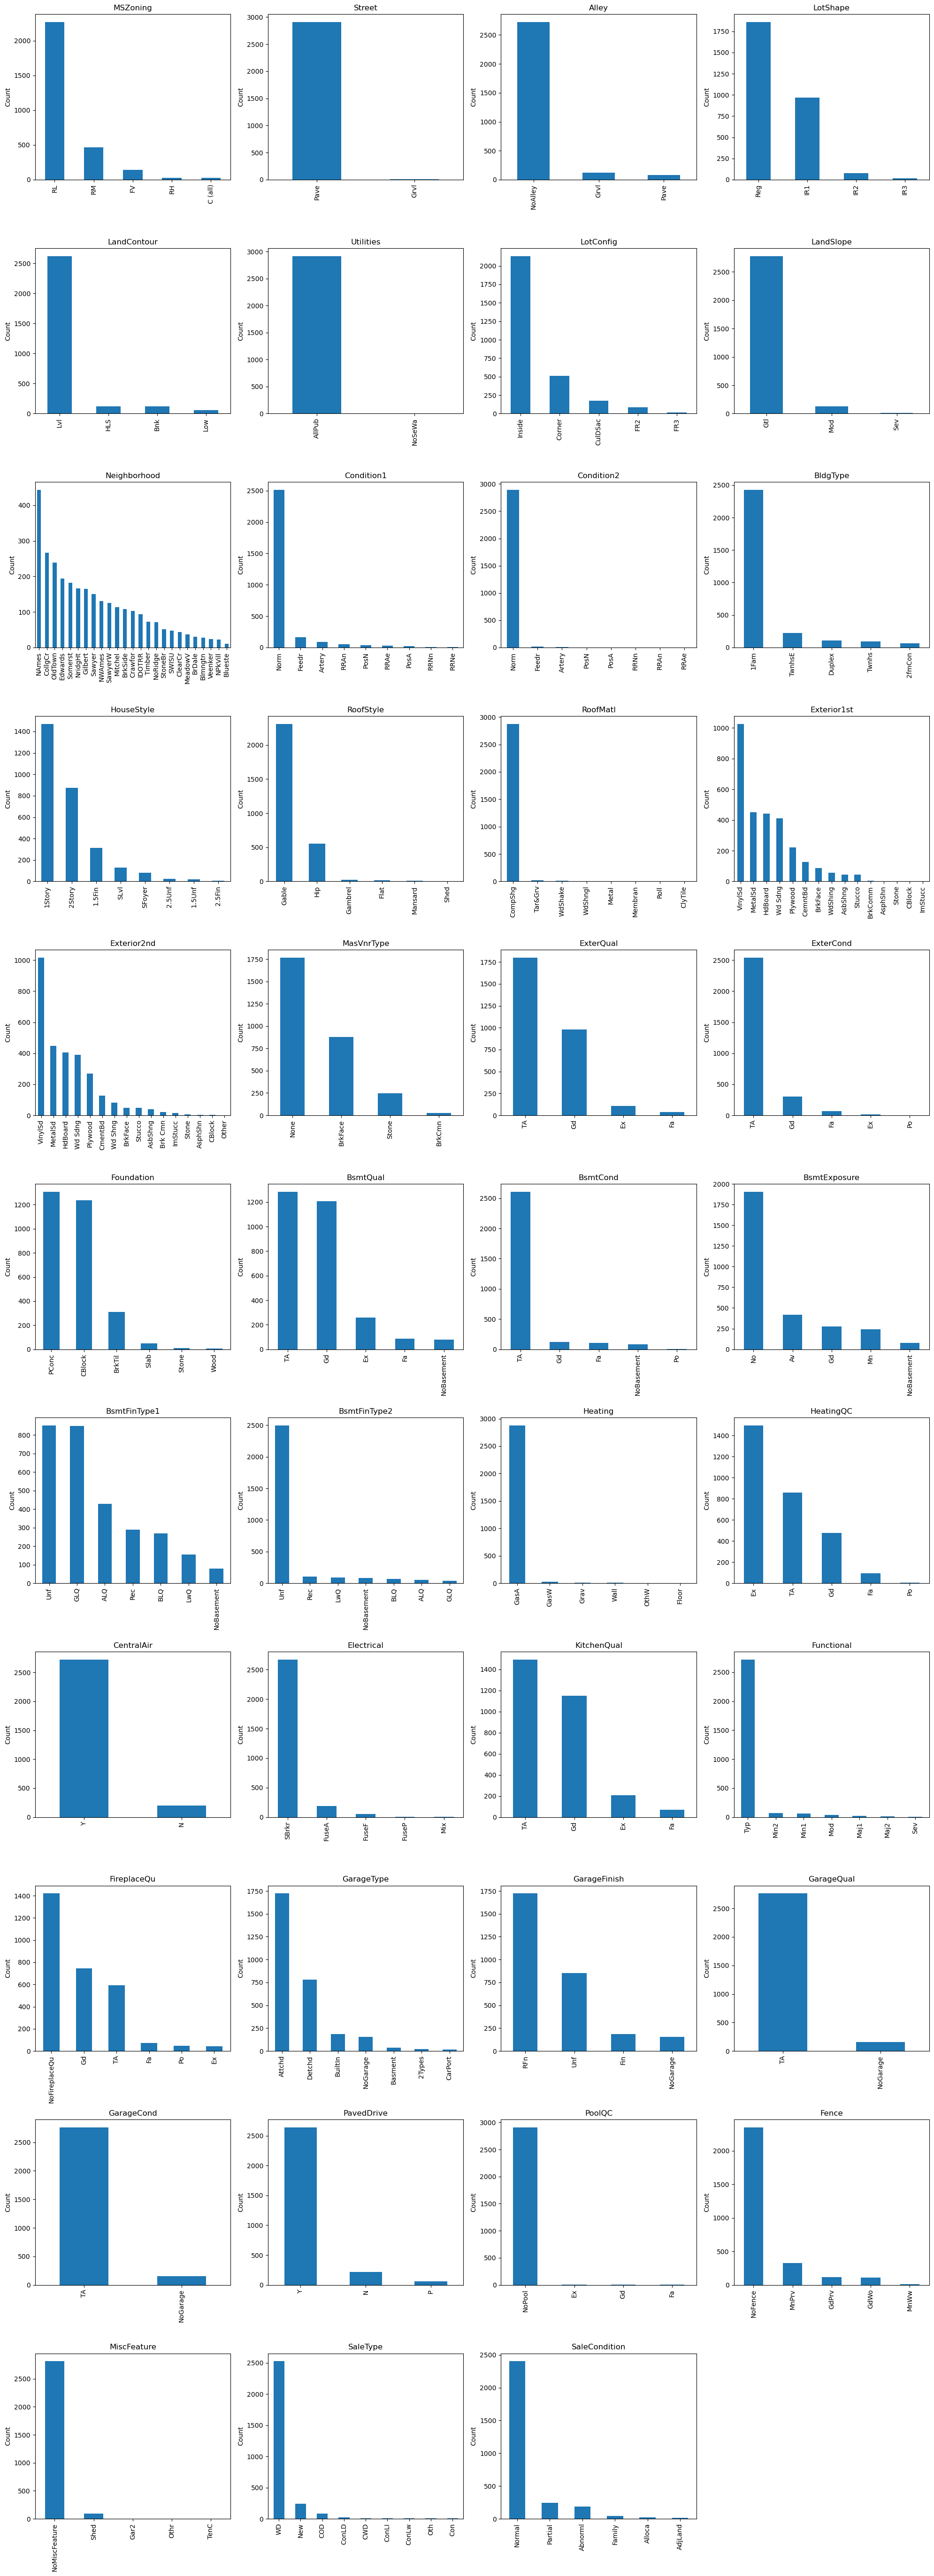

In [118]:
import matplotlib.pyplot as plt

# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Set up the subplot grid
n_cols = 4
n_rows = -(-len(cat_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


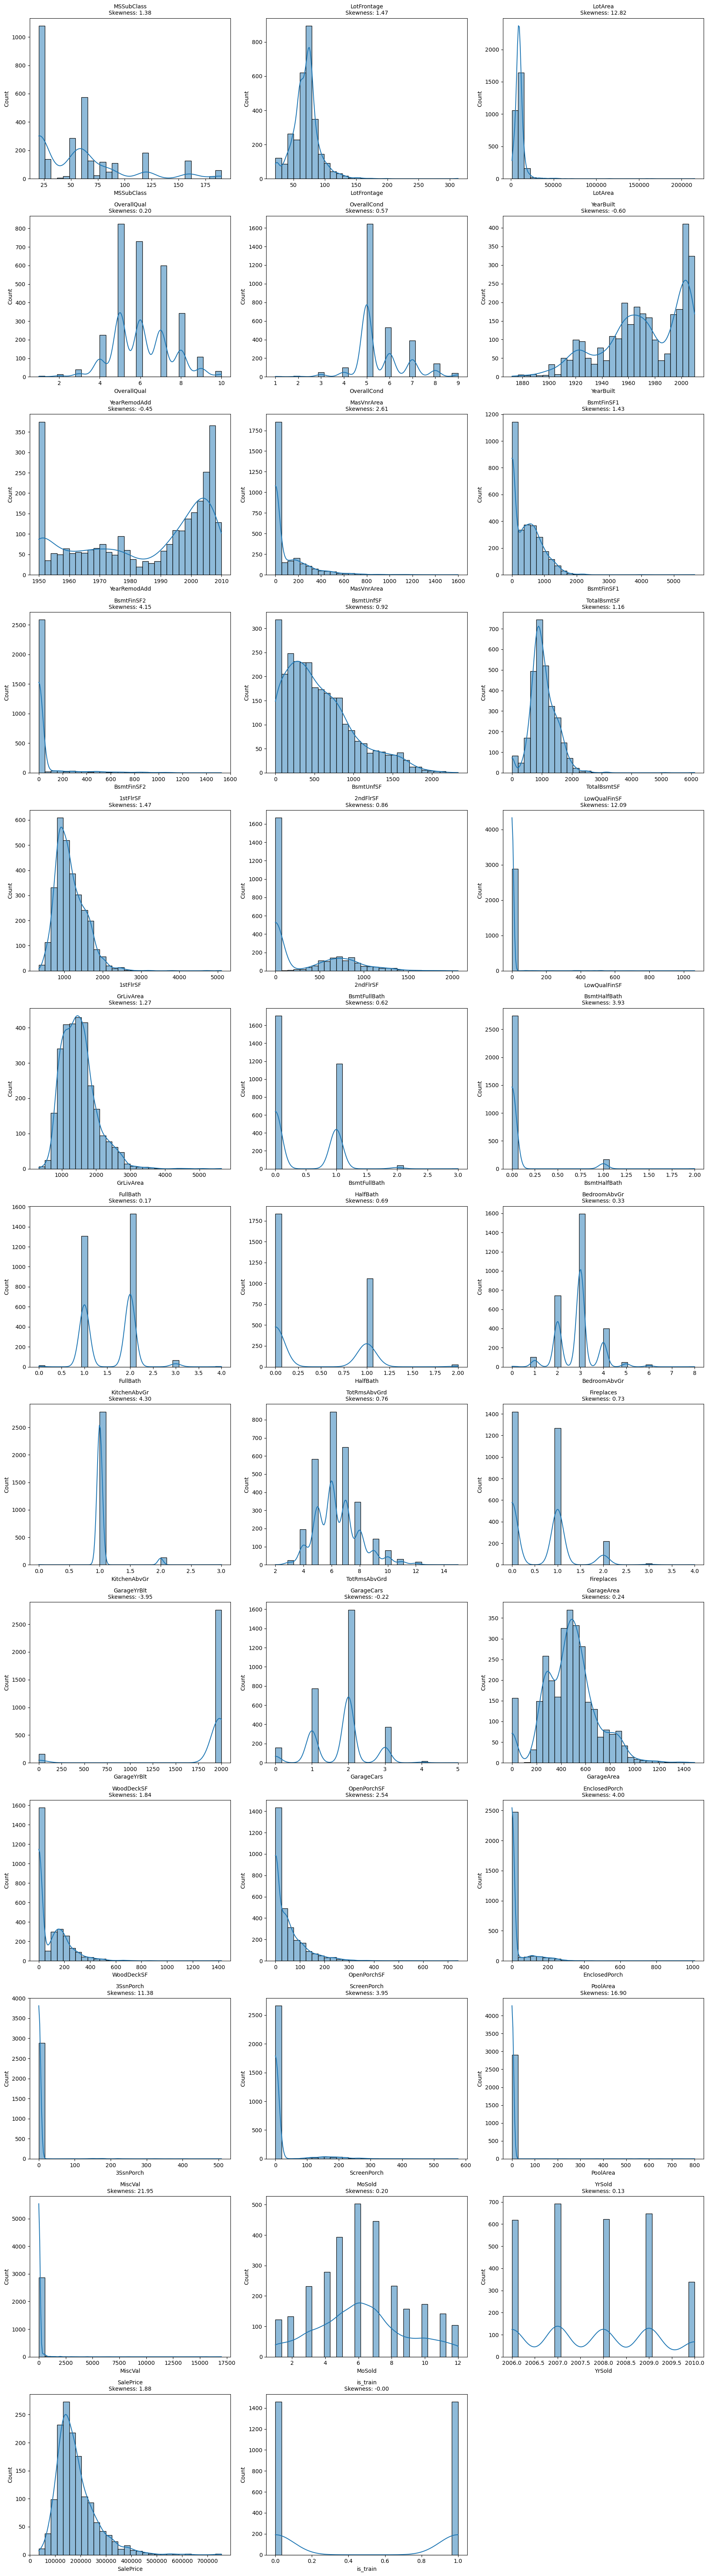

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplot grid
n_cols = 3
n_rows = -(-len(num_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot hist + KDE and show skewness
for i, col in enumerate(num_cols):
    col_skew = skew(df[col].dropna())
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'{col}\nSkewness: {col_skew:.2f}', fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [120]:
# Import skew from scipy
from scipy.stats import skew

# Select only numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute skewness for each numerical column
skewness_values = df[numerical_cols].apply(lambda x: skew(x.dropna()))

# Sort by skewness for better readability (optional)
skewness_values = skewness_values.sort_values(ascending=False)

# Display the result
print(skewness_values)


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
SalePrice         1.880941
WoodDeckSF        1.842433
LotFrontage       1.472982
1stFlrSF          1.469604
BsmtFinSF1        1.425378
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162616
BsmtUnfSF         0.919703
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241184
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
is_train         -0.000685
GarageCars       -0.218593
YearRemodAdd     -0.451020
YearBuilt        -0.599806
G

In [121]:
# Bin LotArea into quartiles
df['LotArea_bin'] = pd.qcut(df['LotArea'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])




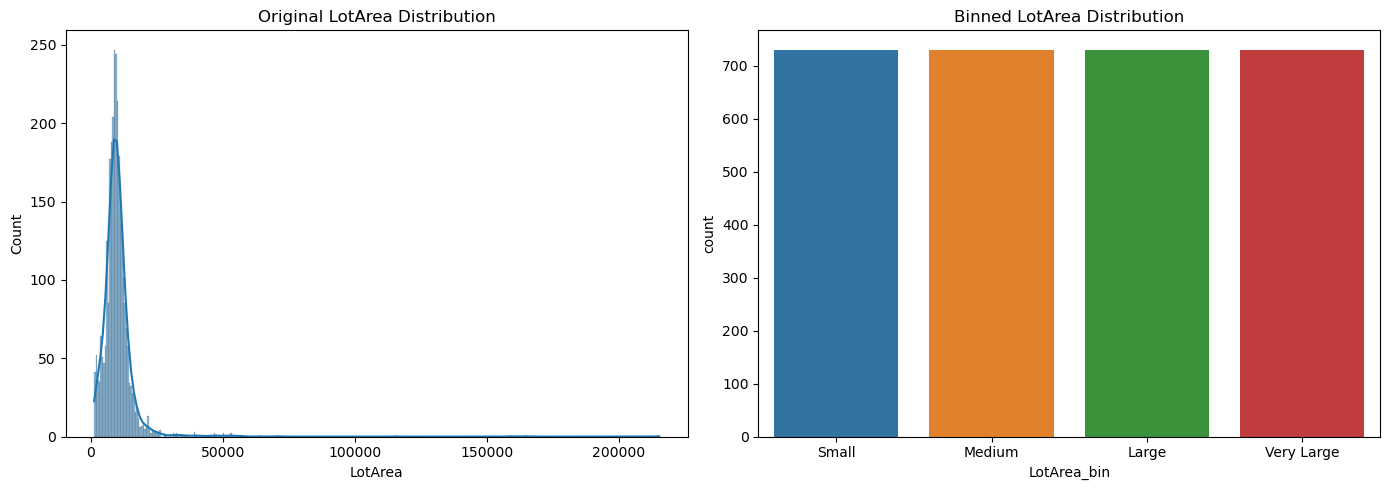

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['LotArea'], kde=True, ax=axes[0])
axes[0].set_title("Original LotArea Distribution")

sns.countplot(x='LotArea_bin', data=df, ax=axes[1])
axes[1].set_title("Binned LotArea Distribution")
plt.tight_layout()
plt.show()


In [123]:
df['YearBuilt_bin'] = pd.cut(
    df['YearBuilt'],
    bins=[1800, 1940, 1970, 2000, 2010],
    labels=['Old', 'Mid-Age', 'Modern', 'New']
)

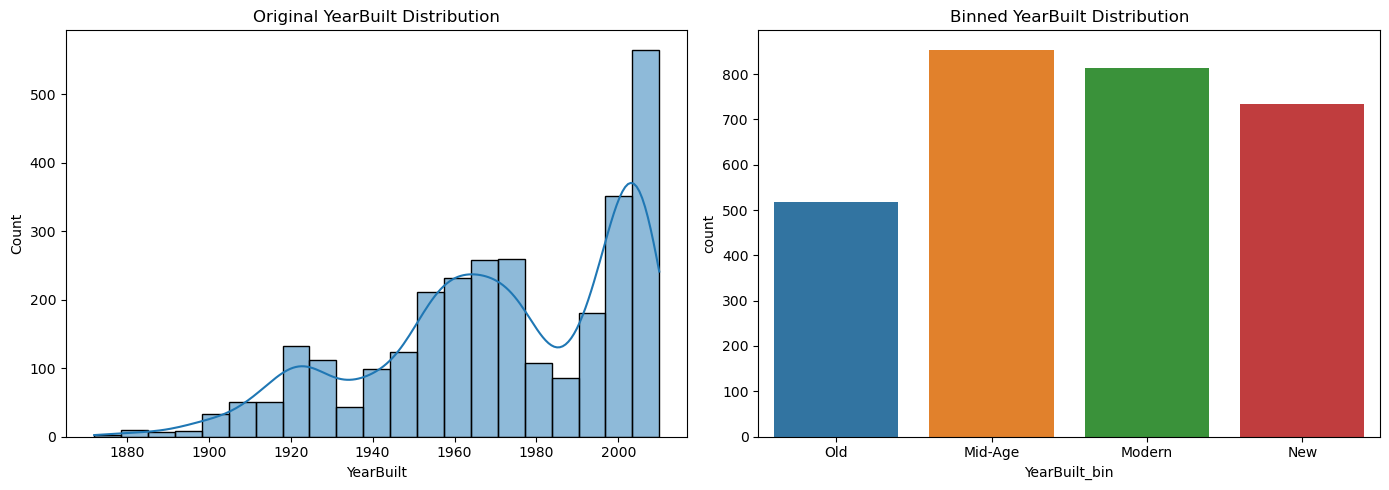

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original distribution
sns.histplot(df['YearBuilt'], kde=True, ax=axes[0])
axes[0].set_title("Original YearBuilt Distribution")

# Binned category counts
sns.countplot(x='YearBuilt_bin', data=df, ax=axes[1], order=['Old', 'Mid-Age', 'Modern', 'New'])
axes[1].set_title("Binned YearBuilt Distribution")

plt.tight_layout()
plt.show()



In [125]:
# Select numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute skewness
skew_vals = df[num_cols].skew().sort_values(ascending=False)

# Filter for high skew
high_skew_cols = skew_vals[abs(skew_vals) > 1].index.tolist()
print("Highly skewed columns:\n", high_skew_cols)



Highly skewed columns:
 ['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'SalePrice', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'MSSubClass', 'GrLivArea', 'TotalBsmtSF', 'GarageYrBlt']


In [126]:
# Log transform positive-only skewed features
import numpy as np

for col in high_skew_cols:
    if (df[col] > 0).all():  # log1p only on positive data
        df[col + '_log'] = np.log1p(df[col])


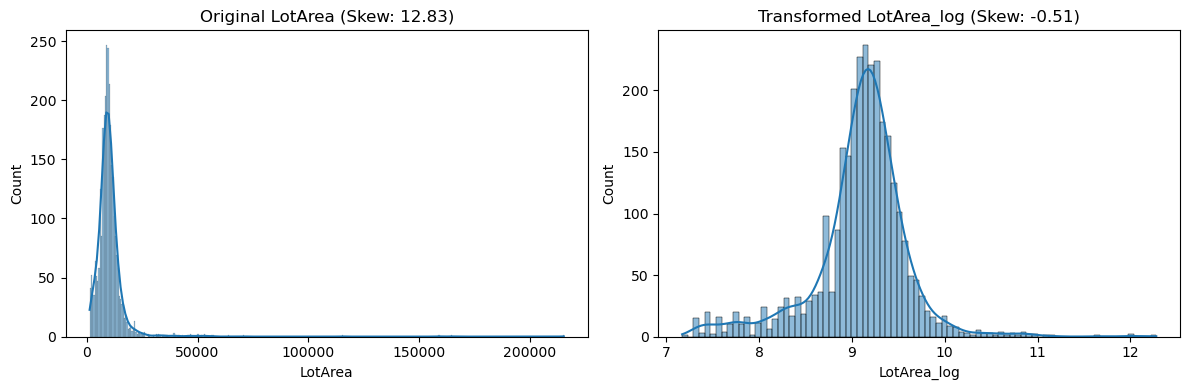

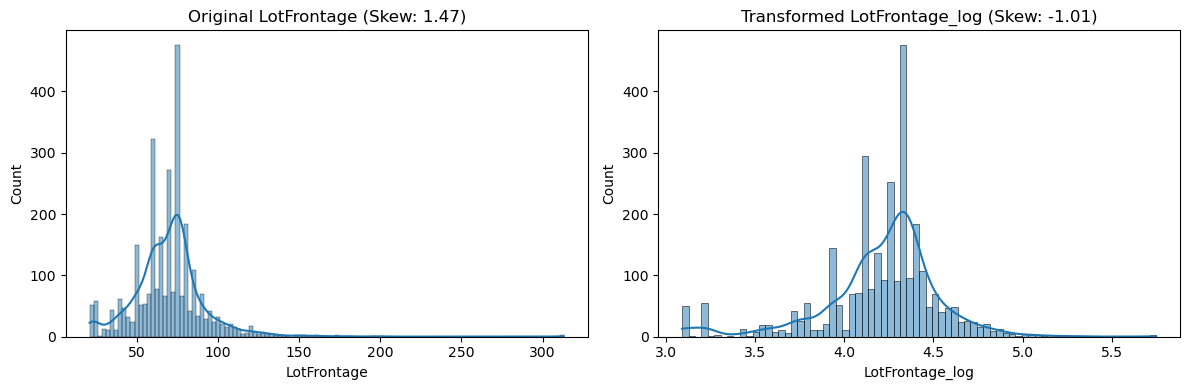

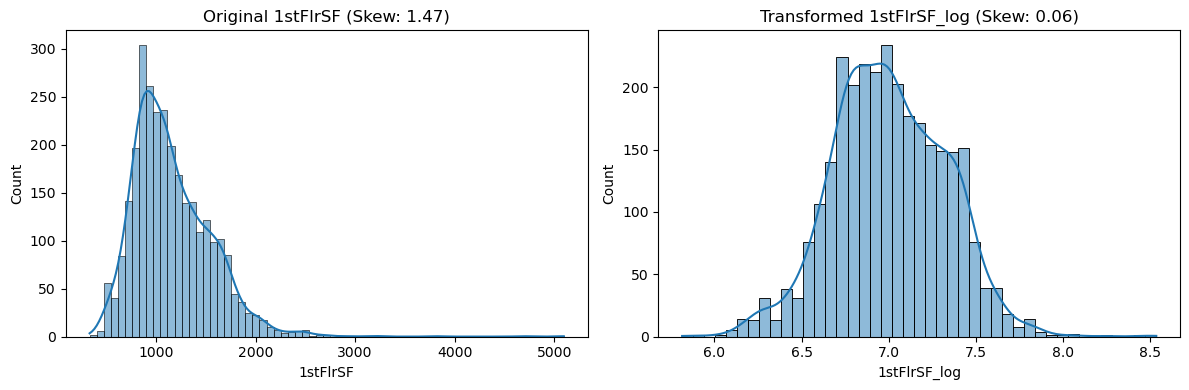

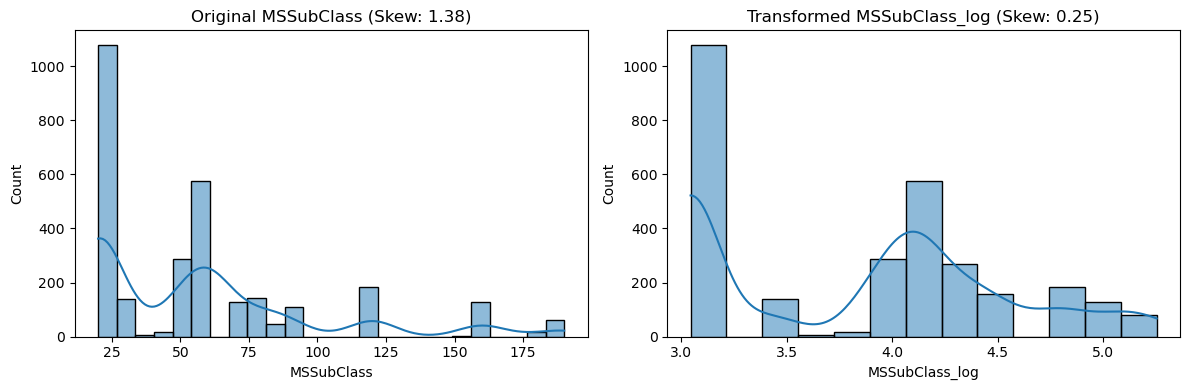

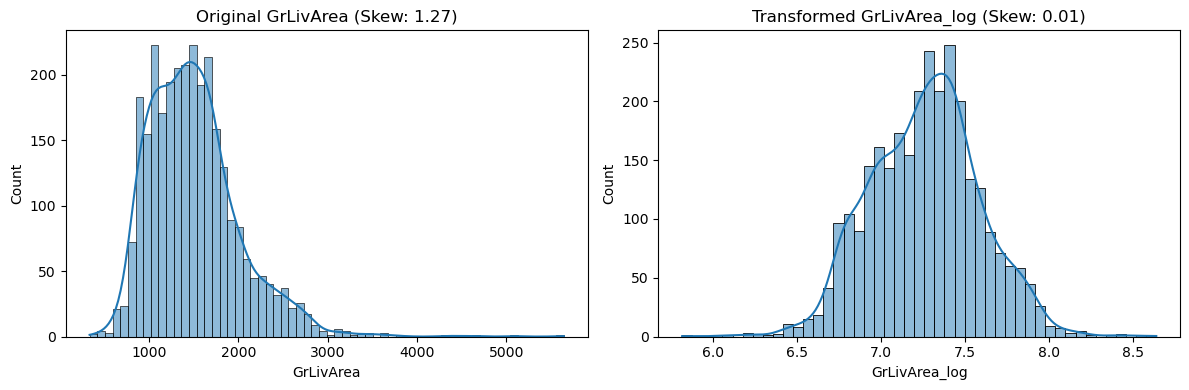

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in high_skew_cols:
    if col + '_log' in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Original {col} (Skew: {df[col].skew():.2f})')

        sns.histplot(df[col + '_log'], kde=True, ax=axes[1])
        axes[1].set_title(f'Transformed {col}_log (Skew: {df[col + "_log"].skew():.2f})')
        plt.tight_layout()
        plt.show()


In [128]:
from sklearn.preprocessing import PowerTransformer

# Identify negatively skewed features
neg_skewed_cols = skew_vals[skew_vals < -1].index.tolist()
print("Negatively skewed features:", neg_skewed_cols)

# Initialize transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply transformation
for col in neg_skewed_cols:
    reshaped = df[[col]].dropna()  # Drop NA to avoid errors
    transformed = pt.fit_transform(reshaped)
    df.loc[reshaped.index, col + '_yj'] = transformed


Negatively skewed features: ['GarageYrBlt']


In [129]:
for col in neg_skewed_cols:
    if col + '_yj' in df.columns:
        print(f"{col} → original skew: {df[col].skew():.2f} | transformed skew: {df[col + '_yj'].skew():.2f}")


GarageYrBlt → original skew: -3.95 | transformed skew: -3.92


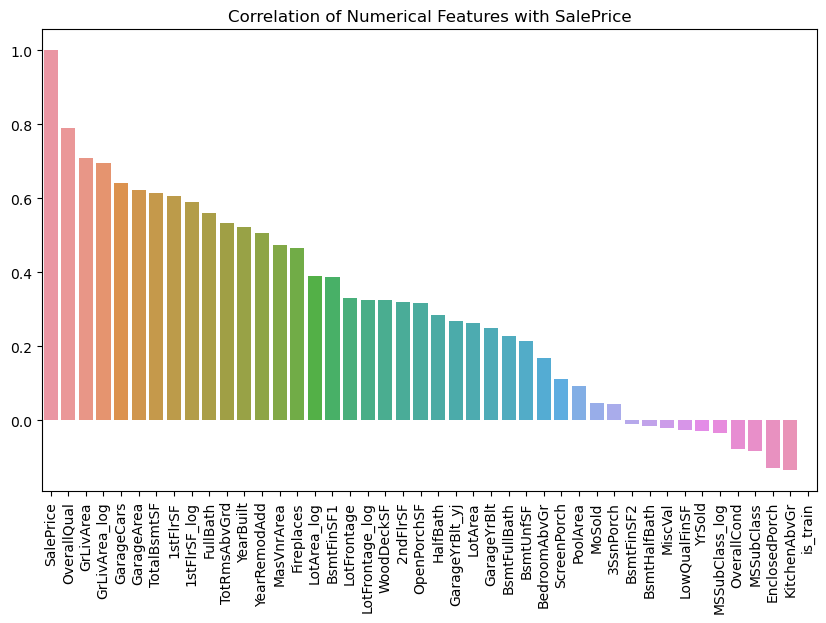

SalePrice          1.000000
OverallQual        0.790982
GrLivArea          0.708624
GrLivArea_log      0.695147
GarageCars         0.640409
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
1stFlrSF_log       0.591299
FullBath           0.560664
TotRmsAbvGrd       0.533723
YearBuilt          0.522897
YearRemodAdd       0.507101
MasVnrArea         0.472614
Fireplaces         0.466929
LotArea_log        0.388528
BsmtFinSF1         0.386420
LotFrontage        0.330520
LotFrontage_log    0.325019
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
HalfBath           0.284108
GarageYrBlt_yj     0.267225
LotArea            0.263843
GarageYrBlt        0.249530
BsmtFullBath       0.227122
BsmtUnfSF          0.214479
BedroomAbvGr       0.168213
ScreenPorch        0.111447
PoolArea           0.092404
MoSold             0.046432
3SsnPorch          0.044584
BsmtFinSF2        -0.011378
BsmtHalfBath      -0.016844
MiscVal           -0

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 1. Numerical Correlation with SalePrice
numerical_features = df.select_dtypes(include=['number']).columns
corr_matrix = df[numerical_features].corr()

# Correlation with SalePrice
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Plotting Correlation with SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=saleprice_corr.index, y=saleprice_corr.values)
plt.xticks(rotation=90)
plt.title("Correlation of Numerical Features with SalePrice")
plt.show()

# Print Correlation values for numerical features
print(saleprice_corr)



In [131]:
from scipy.stats import kruskal

# 2. Categorical Correlation with SalePrice (Kruskal-Wallis Test for each categorical feature)
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if df[feature].nunique() > 1:  # Ensure feature has more than one category
        groups = [df[df[feature] == category]['SalePrice'].dropna() for category in df[feature].unique()]
        if len(groups) > 1:
            h_stat, p_value = kruskal(*groups)
            print(f"Kruskal-Wallis Test for {feature} - p-value: {p_value}")
            
            # Check significance
            if p_value < 0.05:
                print(f"Result: The test is significant (p-value < 0.05).")
            else:
                print(f"Result: The test is NOTsignificant(p-value>=0.05).")
        else:
            print(f"Kruskal-Wallis Test for {feature} - Only one group found, skipping")
    else:
        print(f"Kruskal-Wallis Test for {feature} - Not enough unique categories, skipping")


Kruskal-Wallis Test for MSZoning - p-value: 3.0807239995999556e-57
Result: The test is significant (p-value < 0.05).
Kruskal-Wallis Test for Street - p-value: 0.08012555757743882
Result: The test is NOTsignificant(p-value>=0.05).
Kruskal-Wallis Test for Alley - p-value: 1.184056173794853e-10
Result: The test is significant (p-value < 0.05).
Kruskal-Wallis Test for LotShape - p-value: 1.6403232738441862e-32
Result: The test is significant (p-value < 0.05).
Kruskal-Wallis Test for LandContour - p-value: 1.0479232964716673e-07
Result: The test is significant (p-value < 0.05).
Kruskal-Wallis Test for Utilities - p-value: 0.5233079667064577
Result: The test is NOTsignificant(p-value>=0.05).
Kruskal-Wallis Test for LotConfig - p-value: 3.297912123318503e-07
Result: The test is significant (p-value < 0.05).
Kruskal-Wallis Test for LandSlope - p-value: 0.1395379643115706
Result: The test is NOTsignificant(p-value>=0.05).
Kruskal-Wallis Test for Neighborhood - p-value: 6.696799031735812e-168
Re

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a list to hold all target encoded columns
target_encoded_columns = []

# Loop through each categorical column and apply target encoding
for feature in categorical_features:
    if df[feature].nunique() > 1:  # Ensure feature has more than one category
        target_encoded = np.zeros(df.shape[0])  # Array to hold the target encoded values
        
        # Cross-validation loop for encoding
        for train_idx, val_idx in kf.split(df):
            train, val = df.iloc[train_idx], df.iloc[val_idx]
            
            # Compute the target encoding (mean SalePrice) for the training set
            target_means = train.groupby(feature)['SalePrice'].mean()
            
            # Map the target encoding to both the training and validation sets
            train_encoded = train[feature].map(target_means)
            val_encoded = val[feature].map(target_means)
            
            # Assign the encoded values back to the target_encoded array
            target_encoded[val_idx] = val_encoded
        
        # Append the target encoded feature column name
        target_encoded_columns.append('TargetEncoded_' + feature)
        # Add the target encoded feature to the list of DataFrame
        df['TargetEncoded_' + feature] = target_encoded

# Combine all target encoded columns at once
df_encoded = pd.concat([df, df[target_encoded_columns]], axis=1)


In [133]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For standardization
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Or for Min-Max scaling
# scaler = MinMaxScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [134]:
list(df.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [135]:
#df["SalePrice"].describe()

In [147]:
df["SalePrice"].isna().sum()

1459

In [137]:
df["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [145]:
def count_nans(df: pd.DataFrame) -> pd.Series:
    """
    Count and print the number of NaNs in each column of the DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to inspect.

    Returns
    -------
    pd.Series
        A Series indexed by column names containing the count of NaNs.
    """
    # Compute number of NaNs per column
    nan_counts = df.isna().sum()

    # Print results
    for col, cnt in nan_counts.items():
        print(f"{col}: {cnt}")

    return nan_counts

In [146]:
count_nans(df)

MSSubClass: 0
MSZoning: 0
LotFrontage: 0
LotArea: 0
Street: 0
Alley: 0
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 0
MasVnrArea: 0
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 0
BsmtCond: 0
BsmtExposure: 0
BsmtFinType1: 0
BsmtFinSF1: 0
BsmtFinType2: 0
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 0
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 0
GarageType: 0
GarageYrBlt: 0
GarageFinish: 0
GarageCars: 0
GarageArea: 0
GarageQual: 0
GarageCond: 0
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
PoolArea: 0
PoolQC: 0
Fence

MSSubClass                     0
MSZoning                       0
LotFrontage                    0
LotArea                        0
Street                         0
                              ..
TargetEncoded_PoolQC           0
TargetEncoded_Fence            0
TargetEncoded_MiscFeature      1
TargetEncoded_SaleType         3
TargetEncoded_SaleCondition    0
Length: 132, dtype: int64

In [138]:
#df["SalePrice"].where(df["SalePrice"]<0)

# Classification

In [151]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [140]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SaleType'])
y = df['SaleType']

#need to change all variables into numerical as scikitlearn can not work others
# Find all object (string) or categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# One‑hot encode each in a loop
for col in categorical_cols:
    dummies = pd.get_dummies(X[col], prefix=col)
    X = pd.concat([X.drop(columns=[col]), dummies], axis=1)

# Preview
print("X shape:", X.shape)
print("y shape:", y.shape)
print("First few rows of X:\n", X.head())
print("First few values of y:\n", y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



X shape: (2919, 344)
y shape: (2919,)
First few rows of X:
    MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.067331    -0.206688 -0.217879     0.646183    -0.507284   1.046258   
1   -0.873616     0.482088 -0.072044    -0.063185     2.188279   0.154764   
2    0.067331    -0.068933  0.137197     0.646183    -0.507284   0.980221   
3    0.302568    -0.436280 -0.078385     0.646183    -0.507284  -1.859351   
4    0.067331     0.665762  0.518903     1.355551    -0.507284   0.947203   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
0      0.896833    0.529034    0.580959   -0.293025  ...   
1     -0.395604   -0.567016    1.178162   -0.293025  ...   
2      0.848965    0.338903    0.097928   -0.293025  ...   
3     -0.682812   -0.567016   -0.494884   -0.293025  ...   
4      0.753229    1.390216    0.468984   -0.293025  ...   

   SaleCondition_Normal  SaleCondition_Partial  LotArea_bin_Small  \
0                     1                      0 

Base

In [152]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Test accuracy:", clf.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.9719917012448133
Confusion Matrix:
[[  2   0   0   0   0   0   0   0  31]
 [  0   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0  12]
 [  0   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0  66   0  11]
 [  0   0   0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   5   0 823]]


[Text(0.52, 0.9285714285714286, 'x[85] <= 0.036\ngini = 0.238\nsamples = 1955\nvalue = [54, 9, 4, 14, 6, 6, 162, 2, 1698]'),
 Text(0.3, 0.7857142857142857, 'x[85] <= -0.567\ngini = 0.084\nsamples = 1775\nvalue = [54, 0, 0, 14, 1, 6, 0, 2, 1698]'),
 Text(0.26, 0.6428571428571429, 'x[6] <= -0.228\ngini = 0.468\nsamples = 77\nvalue = [54, 0, 0, 14, 1, 6, 0, 2, 0]'),
 Text(0.12, 0.5, 'x[5] <= -0.819\ngini = 0.468\nsamples = 65\nvalue = [52, 0, 0, 6, 0, 6, 0, 1, 0]'),
 Text(0.08, 0.35714285714285715, 'gini = 0.322\nsamples = 21\nvalue = [10, 0, 0, 5, 0, 6, 0, 0, 0]'),
 Text(0.16, 0.35714285714285715, 'x[51] <= 0.008\ngini = 0.349\nsamples = 44\nvalue = [42, 0, 0, 1, 0, 0, 0, 1, 0]'),
 Text(0.08, 0.21428571428571427, 'x[85] <= -1.766\ngini = 0.088\nsamples = 34\nvalue = [33, 0, 0, 0, 0, 0, 0, 1, 0]'),
 Text(0.04, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 0]'),
 Text(0.12, 0.07142857142857142, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0, 0, 0, 0, 0, 0, 0

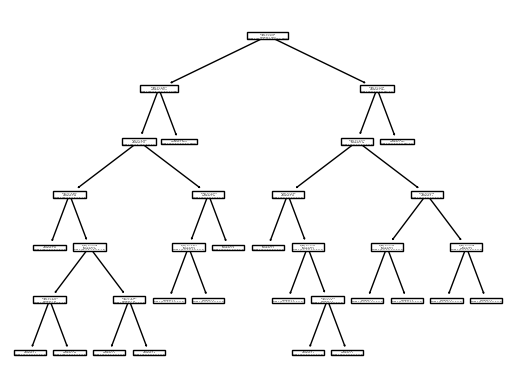

In [142]:
tree.plot_tree(clf)

Clustering

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

'''
# 1. Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
'''
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   
    ('scaler', StandardScaler()),                    
    ('knn', KNeighborsClassifier(n_neighbors=9))      
])

# 2. Initialize and train the KNN classifier
#knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
pipeline.fit(X_train, y_train)

# 3. Make predictions
y_pred = pipeline.predict(X_test)

# 4. Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9243
Classification Report:
              precision    recall  f1-score   support

         COD       1.00      0.03      0.06        33
         CWD       0.00      0.00      0.00         3
         Con       0.00      0.00      0.00         1
       ConLD       0.00      0.00      0.00        12
       ConLI       0.00      0.00      0.00         3
       ConLw       0.00      0.00      0.00         2
         New       0.97      0.82      0.89        77
         Oth       0.00      0.00      0.00         5
          WD       0.92      1.00      0.96       828

    accuracy                           0.92       964
   macro avg       0.32      0.21      0.21       964
weighted avg       0.90      0.92      0.90       964

Confusion Matrix:
[[  1   0   0   0   0   0   0   0  32]
 [  0   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0  12]
 [  0   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   2]
 [ 

c:\Users\livin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\livin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\livin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Clustering as a feature

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 4) Impute missing values & scale
imputer = SimpleImputer(strategy='median')
scaler  = StandardScaler()

X_train_imp    = imputer.fit_transform(X_train)
X_test_imp     = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)

# 5) Clustering on the training set to generate a new feature
n_clusters = y_train.nunique()        # e.g. one cluster per class
kmeans     = KMeans(n_clusters=n_clusters, random_state=42)
train_lbls = kmeans.fit_predict(X_train_scaled)
test_lbls  = kmeans.predict(X_test_scaled)

# 6) Rebuild DataFrames with string column names, then append cluster labels
#    Ensure all column names are strings
X_train_feat = pd.DataFrame(
    X_train_scaled,
    index=X_train.index,
    columns=X_train.columns.astype(str)
)
X_train_feat['cluster'] = train_lbls
X_train_feat.columns = X_train_feat.columns.map(str)

X_test_feat = pd.DataFrame(
    X_test_scaled,
    index=X_test.index,
    columns=X_test.columns.astype(str)
)
X_test_feat['cluster'] = test_lbls
X_test_feat.columns = X_test_feat.columns.map(str)

# 7) Train a Decision Tree on the augmented feature set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_feat, y_train)

# 8) Evaluate on the test set
y_pred = dt.predict(X_test_feat)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\livin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 0.9719917012448133

Classification Report:
              precision    recall  f1-score   support

         COD       0.73      0.67      0.70        33
         CWD       0.50      1.00      0.67         3
         Con       0.00      0.00      0.00         1
       ConLD       0.25      0.33      0.29        12
       ConLI       0.00      0.00      0.00         3
       ConLw       0.00      0.00      0.00         2
         New       0.99      1.00      0.99        77
         Oth       1.00      0.60      0.75         5
          WD       1.00      1.00      1.00       828

    accuracy                           0.97       964
   macro avg       0.50      0.51      0.49       964
weighted avg       0.97      0.97      0.97       964


Confusion Matrix:
[[ 22   0   0  10   0   1   0   0   0]
 [  0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0]
 [  6   0   0   4   0   2   0   0   0]
 [  0   3   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   

c:\Users\livin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\livin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\livin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
